In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define file path and load data
data_dir = '../data/processed/'
file_name = 'cleaned_dataset.csv'
df = pd.read_csv(os.path.join(data_dir, file_name))\

print(f"Number of rows and columns: {df.shape}\n")
print("Dataset information:")
print(df.info())

Number of rows and columns: (7121, 51)

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7121 entries, 0 to 7120
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            7121 non-null   int64  
 1   Index                                                 7121 non-null   int64  
 2   Address                                               7121 non-null   object 
 3   FLAG                                                  7121 non-null   int64  
 4   Avg min between sent tnx                              7121 non-null   float64
 5   Avg min between received tnx                          7121 non-null   float64
 6   Time Diff between first and last (Mins)               7121 non-null   float64
 7   Sent tnx                                              7121 non-null   int64  
 8

In [102]:
print("\nSummary statistics of numeric columns:")
print(df.describe())


Summary statistics of numeric columns:
        Unnamed: 0        Index         FLAG  Avg min between sent tnx  \
count  7121.000000  7121.000000  7121.000000               7121.000000   
mean   4772.818846  1843.429294     0.189580               4472.630513   
std    2781.004115  1237.050298     0.391996              17741.696100   
min       0.000000     1.000000     0.000000                  0.000000   
25%    2386.000000   834.000000     0.000000                  0.000000   
50%    4743.000000  1668.000000     0.000000                 23.210000   
75%    7107.000000  2646.000000     0.000000                733.090000   
max    9840.000000  4729.000000     1.000000             299334.140000   

       Avg min between received tnx  Time Diff between first and last (Mins)  \
count                   7121.000000                             7.121000e+03   
mean                    7846.636450                             1.901013e+05   
std                    23408.471326                  

In [103]:
missing = df.isnull().sum()
print("\nColumns with missing values:")
print(missing[missing > 0])


Columns with missing values:
Series([], dtype: int64)


In [104]:
# Display count of classes in target column 'FLAG'
target_col = 'FLAG'
print("\nCounts per class:")
print(df[target_col].value_counts())


Counts per class:
FLAG
0    5771
1    1350
Name: count, dtype: int64


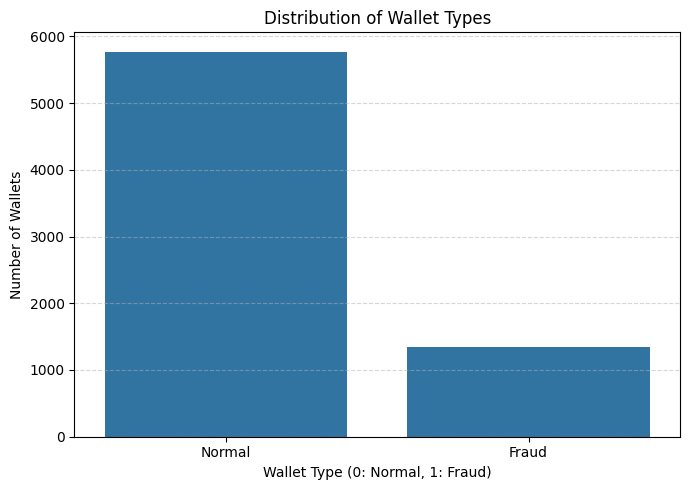

In [105]:
plt.figure(figsize=(7, 5))
sns.countplot(x=target_col, data=df)
plt.title('Distribution of Wallet Types')
plt.xlabel('Wallet Type (0: Normal, 1: Fraud)')
plt.ylabel('Number of Wallets')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
